In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data folder path
data_folder = "../data/"
data_file = "admission.csv"

In [3]:
# explore the data
data = pd.read_csv(data_folder + data_file)
data.rename(
    columns={"LOR ": "LOR", "Chance of Admit ": "Chance of Admit"}, inplace=True
)
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
# Shape and size of the data
data.shape, data.size

((500, 9), 4500)

In [5]:
# Data types
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# The parameters included are :
- Serial No. is id of student  
- GRE Scores ( out of 340 )  
- TOEFL Scores ( out of 120 )  
- University Rating ( out of 5 )  
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
- Undergraduate GPA ( out of 10 )  
- Research Experience ( either 0 or 1 )  
- Chance of Admit ( ranging from 0 to 1 )  

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
# Check for missing values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Target

<Axes: ylabel='Frequency'>

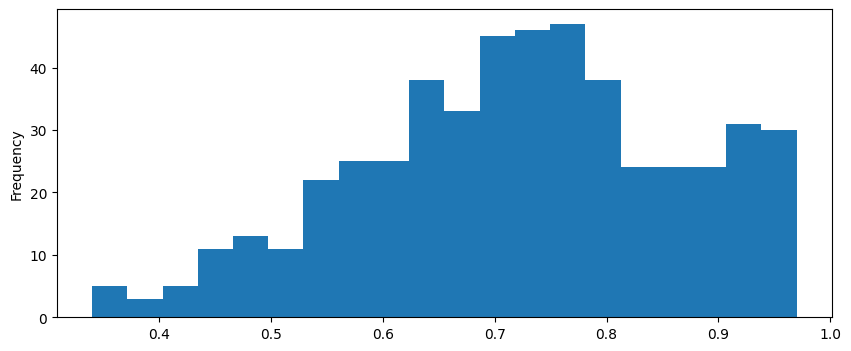

In [8]:
data["Chance of Admit"].plot.hist(bins=20, figsize=(10, 4))

## Check for any outliers in the data

<Axes: ylabel='Frequency'>

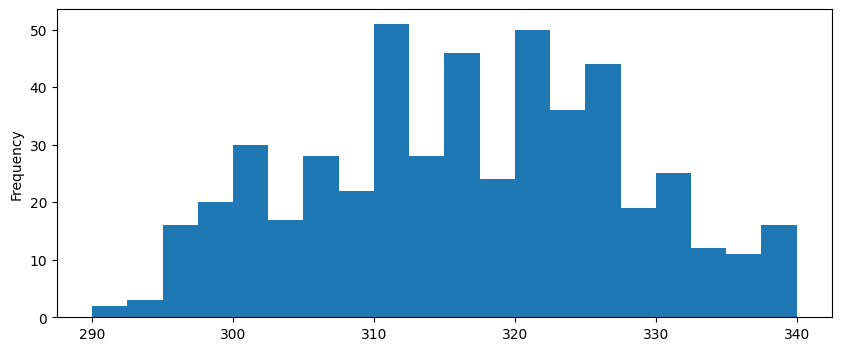

In [9]:
data["GRE Score"].plot.hist(bins=20, figsize=(10, 4))  # Good

<Axes: ylabel='Frequency'>

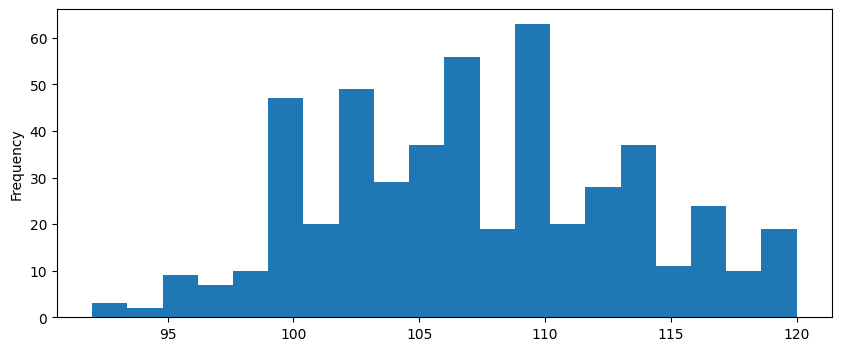

In [10]:
data["TOEFL Score"].plot.hist(bins=20, figsize=(10, 4))  # Good

<Axes: ylabel='Frequency'>

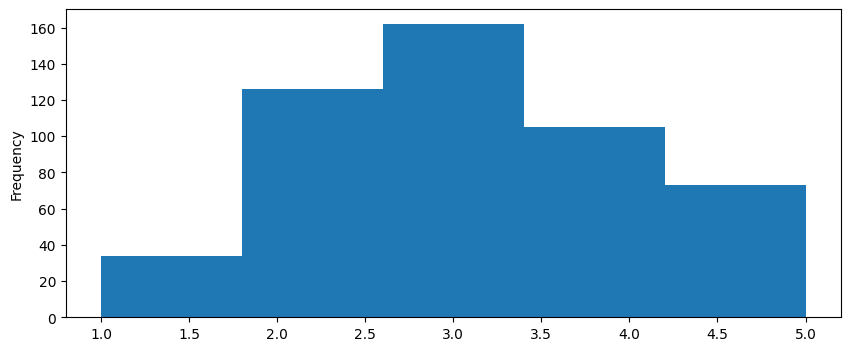

In [11]:
data["University Rating"].plot.hist(bins=5, figsize=(10, 4))

<Axes: ylabel='Frequency'>

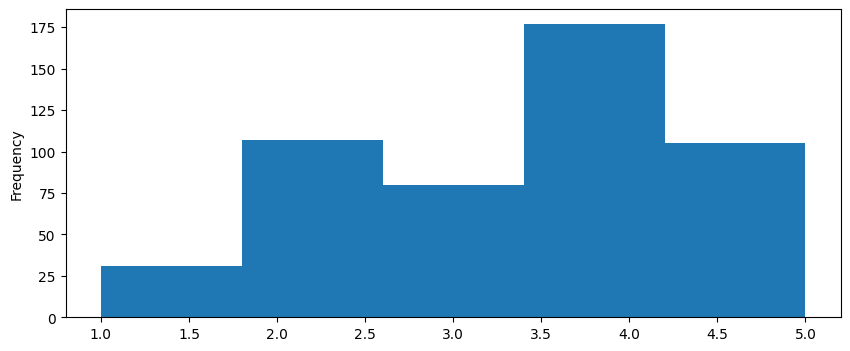

In [12]:
data["SOP"].plot.hist(bins=5, figsize=(10, 4))

<Axes: ylabel='Frequency'>

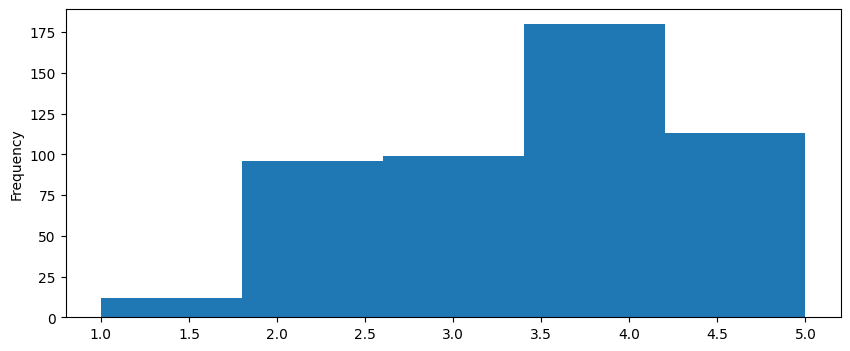

In [13]:
data["LOR"].plot.hist(bins=5, figsize=(10, 4))

<Axes: ylabel='Frequency'>

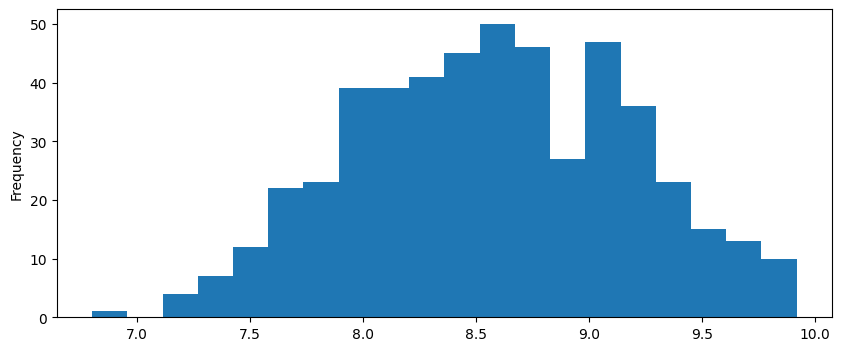

In [14]:
data["CGPA"].plot.hist(bins=20, figsize=(10, 4))

<Axes: ylabel='Frequency'>

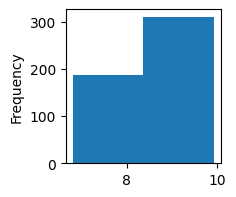

In [15]:
data["CGPA"].plot.hist(bins=2, figsize=(2, 2))

### No outliers whatsoever

## Now check any correlation between the features

In [16]:
clean = data.copy()
clean.drop("Serial No.", axis=1, inplace=True)
clean.corr(numeric_only=True).style.background_gradient()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


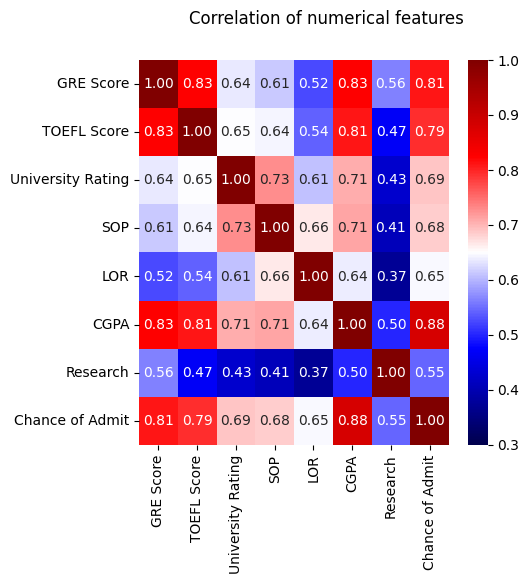

In [17]:
plt.figure(figsize=(5, 5))
plt.suptitle("Correlation of numerical features")
sns.heatmap(
    clean.corr(numeric_only=True),
    annot=True,
    fmt=".02f",
    cmap="seismic",
    vmin=0.3,
    vmax=1.0,
);

As we can see for now, there is a high correlation between Chance of Admit and GRE Scores; TOEFL and mostly CGPA.